In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Loading Data

In [2]:
survey = pd.read_csv("survey_v2.csv", index_col = 0)

In [3]:
survey.head(3)

Respondent ID  Collector ID              Start Date  \
0    11392865280     254782488  03/04/2020 02:02:23 PM   
1    11391985875     254782488  03/04/2020 09:23:12 AM   
2    11390176092     254782488  03/03/2020 07:09:15 PM   

                 End Date    IP Address  \
0  03/04/2020 02:08:09 PM  70.78.136.94   
1  03/04/2020 09:28:37 AM  174.7.248.66   
2  03/03/2020 07:14:38 PM  70.79.224.29   

  Have you heard of the Marine Mammal Rescue Centre (MMR)?  \
0                                                Yes         
1                                                Yes         
2                                                Yes         

  How did you hear about the MMR?             Other (please specify)  \
0              Vancouver Aquarium  Answered in the previous question   
1              Vancouver Aquarium  Answered in the previous question   
2              Vancouver Aquarium  Answered in the previous question   

  On a scale of 1-5 with 1 being negative and 5 being positive, how do you feel about the Marine Mammal Rescue Centre’s services?  \
0                                           Positive                                                                                
1                                           Positive                                                                                
2                                           Positive                                                                                

  Please explain why you chose your selected ranking?  ...   City/Town  \
0  I am a great supporter of the Van Aquarium and...   ...  Abbotsford   
1  It helps numerous marine mammals every year wh...   ...   Vancouver   
2          MMR does good work rehabilitating animals   ...    Richmond   

     State/Province  Country  What is your age?  \
0  British Columbia   Canada              50-64   
1                BC   Canada              50-64   
2                BC   Canada              50-64   

   What is the highest level of education achieved?  \
0                                 Bachelor’s degree   
1                       Master’s or doctoral degree   
2                       Master’s or doctoral degree   

   Do you have an affiliation to MMR?  \
0                                  No   
1                                 Yes   
2                                  No   

   Do you have an affiliation to the Vancouver Aquarium?  \
0                                              Donor       
1                                          Volunteer       
2                                          Volunteer       

   Other (please specify).4  \
0          Didn't answer it   
1          Didn't answer it   
2          Didn't answer it   

  If you would like to be entered into a random draw for two general admission passes to the Vancouver Aquarium, please share your email address:  \
0                                   Didn't answer it                                                                                                
1                         laura.childerson@gmail.com                                                                                                
2                                   Didn't answer it                                                                                                

  clusters  
0        1  
1        1  
2        1  

[3 rows x 38 columns]

## DATA ANALYSIS

In [4]:
survey.describe(include = "all")

Respondent ID  Collector ID              Start Date  \
count    1.390000e+02  1.390000e+02                     139   
unique            NaN           NaN                     139   
top               NaN           NaN  02/26/2020 10:46:59 AM   
freq              NaN           NaN                       1   
mean     1.138349e+10  2.547804e+08                     NaN   
std      2.842783e+06  1.136811e+04                     NaN   
min      1.137184e+10  2.547156e+08                     NaN   
25%      1.138252e+10  2.547825e+08                     NaN   
50%      1.138287e+10  2.547825e+08                     NaN   
75%      1.138415e+10  2.547825e+08                     NaN   
max      1.139287e+10  2.547825e+08                     NaN   

                      End Date     IP Address  \
count                      139            139   
unique                     139            108   
top     03/01/2020 09:25:48 PM  209.52.88.251   
freq                         1              8   
mean                       NaN            NaN   
std                        NaN            NaN   
min                        NaN            NaN   
25%                        NaN            NaN   
50%                        NaN            NaN   
75%                        NaN            NaN   
max                        NaN            NaN   

       Have you heard of the Marine Mammal Rescue Centre (MMR)?  \
count                                                 139         
unique                                                  2         
top                                                   Yes         
freq                                                   97         
mean                                                  NaN         
std                                                   NaN         
min                                                   NaN         
25%                                                   NaN         
50%                                                   NaN         
75%                                                   NaN         
max                                                   NaN         

       How did you hear about the MMR?             Other (please specify)  \
count                              139                                139   
unique                               7                                  5   
top                 Vancouver Aquarium  Answered in the previous question   
freq                                65                                 94   
mean                               NaN                                NaN   
std                                NaN                                NaN   
min                                NaN                                NaN   
25%                                NaN                                NaN   
50%                                NaN                                NaN   
75%                                NaN                                NaN   
max                                NaN                                NaN   

       On a scale of 1-5 with 1 being negative and 5 being positive, how do you feel about the Marine Mammal Rescue Centre’s services?  \
count                                                 139                                                                                
unique                                                  5                                                                                
top                                              Positive                                                                                
freq                                                   87                                                                                
mean                                                  NaN                                                                                
std                                                   NaN                                               

#### SAMPLE SIZE ANALYSIS

We have gathered 139 responses from the survey we took. Considering the population of Vancouver Great Area, this means that there is a 90% probability that the confidence interval will contain the true population mean. Margin of error of plus or minus  7%. 


In [5]:
# Vancouver population size according to BC Stats
pop_van = 2691343

In [6]:
import math
# Script from https://github.com/veekaybee/data/blob/master/samplesize.py
# SUPPORTED CONFIDENCE LEVELS: 50%, 68%, 90%, 95%, and 99%
confidence_level_constant = [50,.67], [68,.99], [90,1.64], [95,1.96], [99,2.57]
 
# CALCULATE THE SAMPLE SIZE
def sample_size(population_size, confidence_level, confidence_interval):
  Z = 0.0
  p = 0.5
  e = confidence_interval/100.0
  N = population_size
  n_0 = 0.0
  n = 0.0
 
  # LOOP THROUGH SUPPORTED CONFIDENCE LEVELS AND FIND THE NUM STD
  # DEVIATIONS FOR THAT CONFIDENCE LEVEL
  for i in confidence_level_constant:
    if i[0] == confidence_level:
      Z = i[1]
 
  if Z == 0.0:
    return -1
 
  # CALC SAMPLE SIZE
  n_0 = ((Z**2) * p * (1-p)) / (e**2)
 
  # ADJUST SAMPLE SIZE FOR FINITE POPULATION
  n = n_0 / (1 + ((n_0 - 1) / float(N)) )
 
  return int(math.ceil(n)) # THE SAMPLE SIZE
 
def main():
  sample_sz = 0
  population_sz = pop_van
  confidence_level = 90.0
  confidence_interval = 7.0
 
  sample_sz = sample_size(population_sz, confidence_level, confidence_interval)
 
  print("SAMPLE SIZE: %d" % sample_sz)
 
if __name__ == "__main__":
  main()

SAMPLE SIZE: 138


Hypothesis Test:

<center> $H_0$: $p_{Non Affiliated} = p_{Affiliated} $ $\;\; vs \;\;$  $H_1$: $p_{Non Affiliated} \neq p_{Affiliated} $ </center>



In [7]:
# Hypothesis test to determine whether the difference between two proportions (awareness of two groups) is significant.

In [8]:
data_test = survey[["Have you heard of the Marine Mammal Rescue Centre (MMR)?", "clusters"]].copy()

In [9]:
cluster_one = data_test.loc[data_test["clusters"] == 1]
cluster_zero = data_test.loc[data_test["clusters"] == 0]
cluster_one.loc[cluster_one["Have you heard of the Marine Mammal Rescue Centre (MMR)?"] == "Yes"] = 1
cluster_one.loc[cluster_one["Have you heard of the Marine Mammal Rescue Centre (MMR)?"] == "No"] = 0
cluster_zero.loc[cluster_zero["Have you heard of the Marine Mammal Rescue Centre (MMR)?"] == "Yes"] = 1
cluster_zero.loc[cluster_zero["Have you heard of the Marine Mammal Rescue Centre (MMR)?"] == "No"] = 0

C:\Users\gisel\anaconda3\envs\deeplearning\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [10]:
c1_sum = cluster_one["Have you heard of the Marine Mammal Rescue Centre (MMR)?"].sum()
c0_sum = cluster_zero["Have you heard of the Marine Mammal Rescue Centre (MMR)?"].sum()

In [11]:
c1_total = cluster_one.shape[0]
c0_total = cluster_zero.shape[0]

In [12]:
data = pd.DataFrame({
    "Aware": [c0_sum, c1_sum],
    "Total": [c0_total, c1_total]
    }, index=['Non affiliated', 'affiliated'])

In [13]:
import statsmodels
from statsmodels.stats.proportion import proportions_ztest
statsmodels.stats.proportion.proportions_ztest(count=data.Aware, nobs=data.Total, alternative='two-sided')
# p value 1.53e-11

(-6.744387075070445, 1.5367435497480686e-11)

In [14]:
statsmodels.stats.proportion.proportions_chisquare(count=data.Aware, nobs=data.Total)

(45.48675701837726,
 1.536743549748081e-11,
 (array([[32, 40],
         [65,  2]], dtype=int64),
  array([[50.24460432, 21.75539568],
         [46.75539568, 20.24460432]])))

 - p-value is very low and we can reject the null hypothesis. There is significant difference between the proportion of non affiliated and affiliated groups when comparing awareness.  

#### Graphs

In [15]:
survey_count = survey["Have you heard of the Marine Mammal Rescue Centre (MMR)?"].value_counts(normalize = True)
survey_count.to_frame()
survey_count = survey_count.reset_index()
survey_count.columns = ["Have you heard of the Marine Mammal Rescue Centre (MMR)?", "Percentage"]

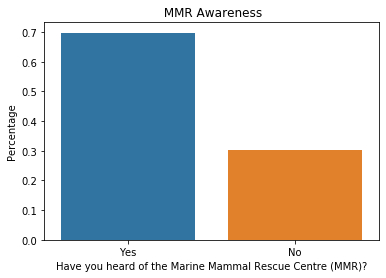

In [16]:
plt.plot()
sns.barplot(x = "Have you heard of the Marine Mammal Rescue Centre (MMR)?", y = "Percentage", data = survey_count)
plt.title(" MMR Awareness")
plt.show()

In [17]:
awareness = survey.groupby(["Have you heard of the Marine Mammal Rescue Centre (MMR)?", "clusters"]).agg(["count"])
awareness = awareness.iloc[:,0:1]
awareness = awareness.reset_index()

In [18]:
awareness.columns = ["Have you heard of the Marine Mammal Rescue Centre (MMR)?","cluster","count"]

In [19]:
awareness[ "Percentage"] = (awareness["count"]/sum(awareness["count"]))*100

In [20]:
awareness["Percentage"] = awareness["Percentage"].round(decimals = 2)

In [21]:
import plotly.express as px
fig = px.bar(awareness,x = "Have you heard of the Marine Mammal Rescue Centre (MMR)?", y = "Percentage", color = "cluster",color_continuous_scale=px.colors.sequential.Viridis, width=800, height=400)

fig.show()


In [22]:
cluster_1 = survey[survey["clusters"] == 1]
cluster_0 = survey[survey["clusters"] == 0]

In [23]:
cluster_1["How did you hear about the MMR?"].value_counts()

Vancouver Aquarium     56
Friend                  7
Haven't heard of it     2
News                    1
Social media            1
Name: How did you hear about the MMR?, dtype: int64

In [24]:
columns_plot = ['Have you heard of the Marine Mammal Rescue Centre (MMR)?',
       'How did you hear about the MMR?',
       'On a scale of 1-5 with 1 being negative and 5 being positive, how do you feel about the Marine Mammal Rescue Centre’s services?',
       'How confident do you feel that you know what to do when you come across a marine mammal in distress?',
       'Please state what actions you would take if you came across a marine mammal in distress. (Rank your choices with 1 being the best).  Feed the mammal shellfish',
       'Don’t do anything, let nature take its course',
       'Call MMR, the Vancouver Aquarium, or a local rehabilitation centre',
       'Take it home and care for it', 'Keep people and pets away',
       'Take the mammal to the nearest veterinary clinic',
       'Have you donated to a charity in the past year?',
         'How do you prefer to make your donations?',
       'Have you considered donating money to the Marine Mammal Rescue Center?',
       'Have you considered donating money to ocean health and conservation causes?',
         'Country', 'What is your age?',
       'What is the highest level of education achieved?',
       'Do you have an affiliation to MMR?',
       'Do you have an affiliation to the Vancouver Aquarium?',
       'Other (please specify).4']

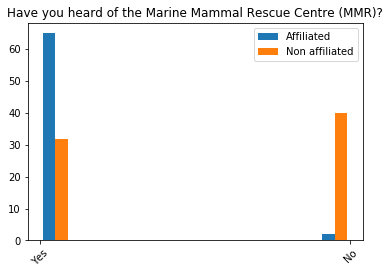

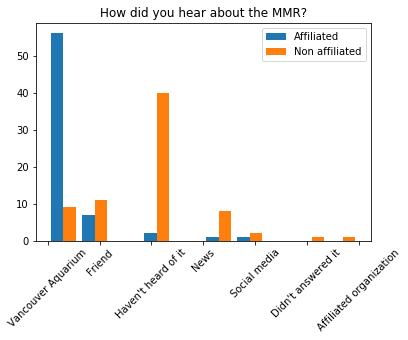

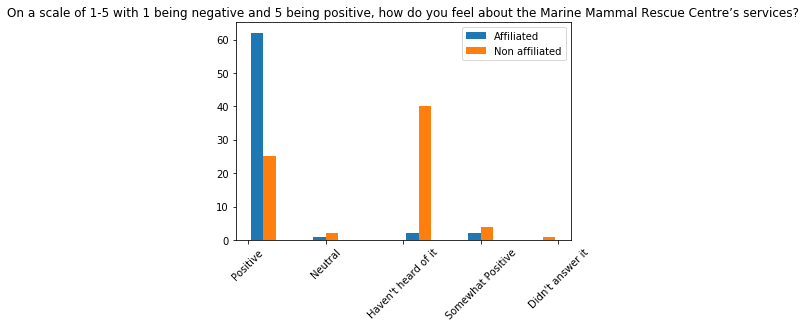

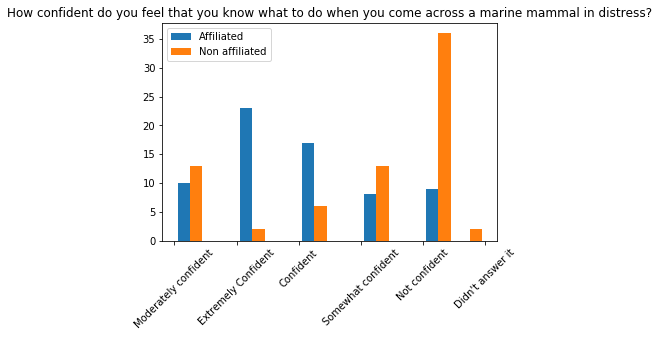

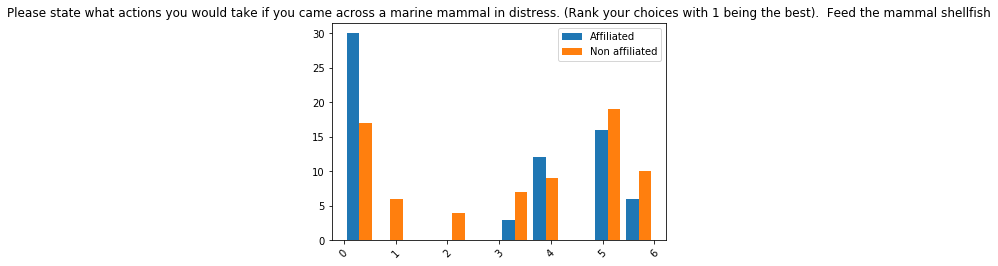

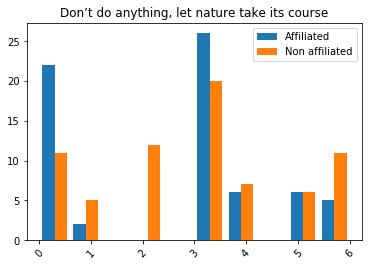

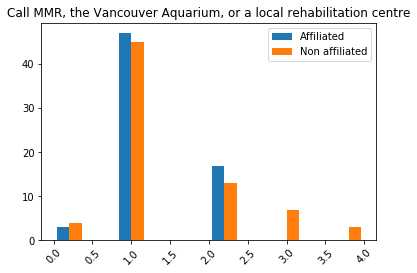

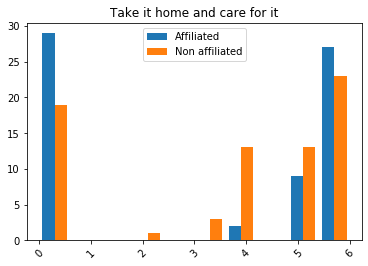

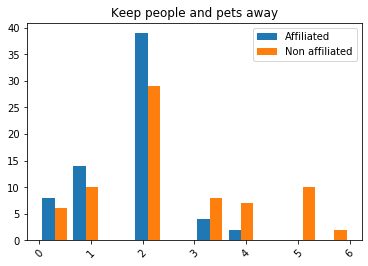

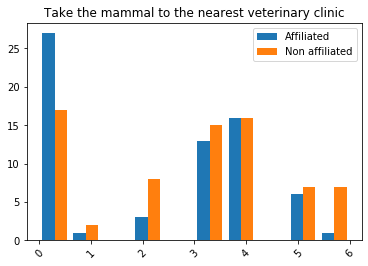

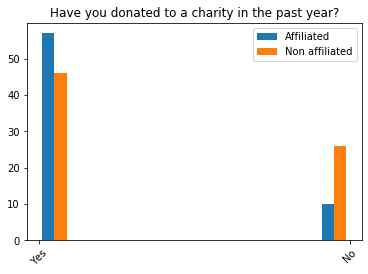

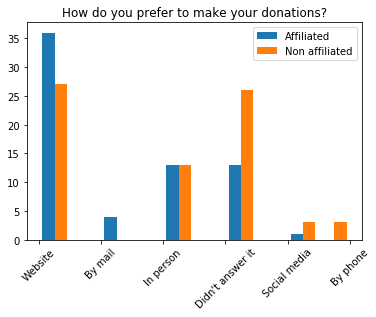

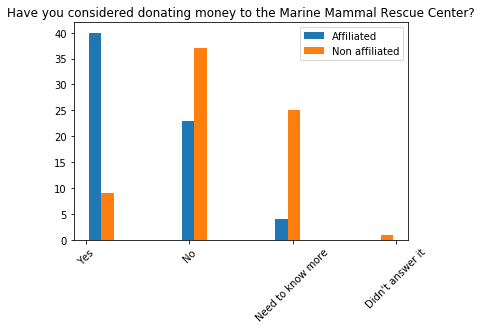

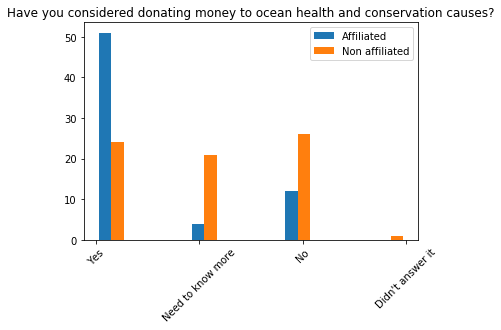

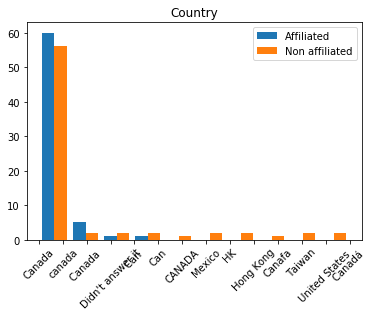

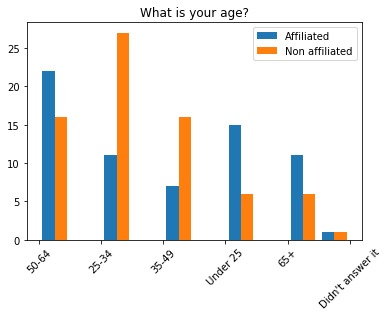

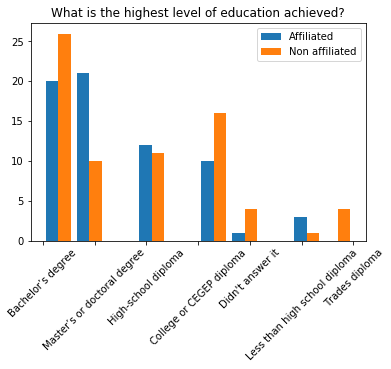

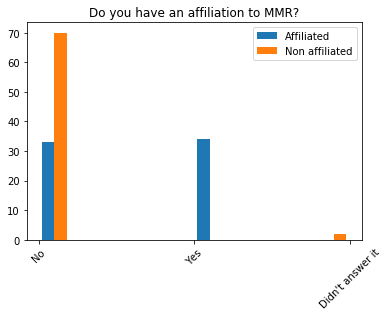

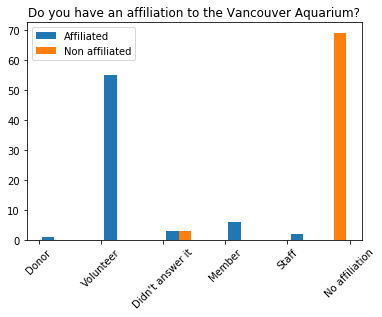

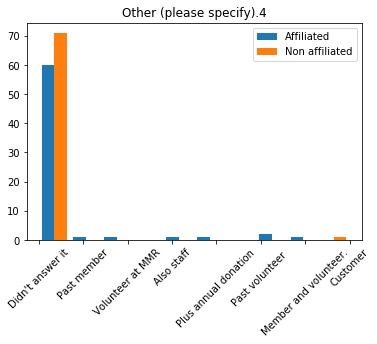

In [25]:
for col in columns_plot:
    plt.plot()
    plt.hist([cluster_1[col],cluster_0[col]])
    plt.title(col)
    labels= ["Affiliated", "Non affiliated"]
    plt.legend(labels)
    plt.xticks(rotation = 45)
    plt.show()
    

## TEXT ANALYSIS

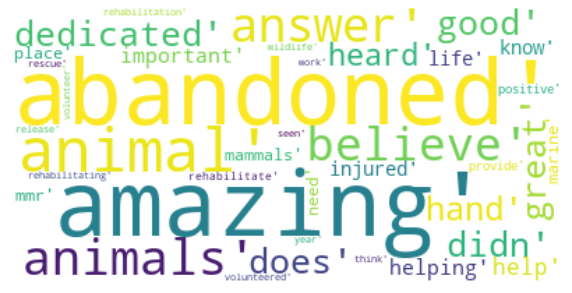

In [26]:
words = cluster_1[["Respondent ID","Please explain why you chose your selected ranking?"]].copy()

from sklearn.feature_extraction.text import TfidfVectorizer

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


reviews = words["Please explain why you chose your selected ranking?"]
tfidf = TfidfVectorizer(min_df= 3,stop_words="english").fit(reviews)
data_positive = tfidf.transform(reviews)
my_df2 = pd.DataFrame(columns=tfidf.get_feature_names(), data=data_positive.toarray())
text = tfidf.get_feature_names()
wordcloud = WordCloud(background_color="white").generate(str(text))
plt.figure(figsize = (10.0,8.0))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


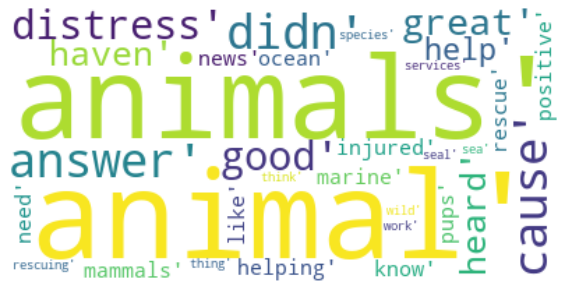

In [27]:
words_0 = cluster_0[["Respondent ID","Please explain why you chose your selected ranking?"]].copy()

from sklearn.feature_extraction.text import TfidfVectorizer

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


reviews_0 = words_0["Please explain why you chose your selected ranking?"]
tfidf_0 = TfidfVectorizer(min_df= 2,stop_words="english").fit(reviews_0)
data_0 = tfidf_0.transform(reviews_0)
my_df3 = pd.DataFrame(columns=tfidf_0.get_feature_names(), data=data_0.toarray())
text_0 = tfidf_0.get_feature_names()
wordcloud_0 = WordCloud(background_color="white").generate(str(text_0))
plt.figure(figsize = (10.0,8.0))
plt.imshow(wordcloud_0, interpolation="bilinear")
plt.axis("off")
plt.show()

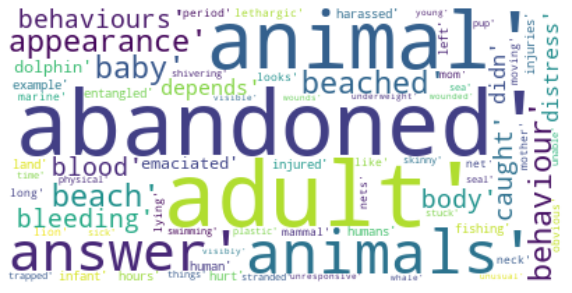

In [28]:

reviews = cluster_1["Please describe what a marine mammal in distress looks like to you?"]
tfidf = TfidfVectorizer(min_df= 2,stop_words="english").fit(reviews)
data_positive = tfidf.transform(reviews)
my_df2 = pd.DataFrame(columns=tfidf.get_feature_names(), data=data_positive.toarray())
text = tfidf.get_feature_names()
wordcloud = WordCloud(background_color="white").generate(str(text))
plt.figure(figsize = (10.0,8.0))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


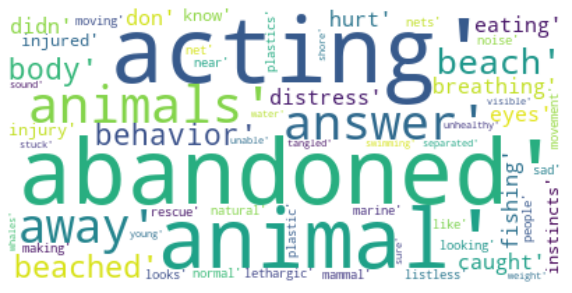

In [29]:
reviews = cluster_0["Please describe what a marine mammal in distress looks like to you?"]
tfidf = TfidfVectorizer(min_df= 2,stop_words="english").fit(reviews)
data_positive = tfidf.transform(reviews)
my_df2 = pd.DataFrame(columns=tfidf.get_feature_names(), data=data_positive.toarray())
text = tfidf.get_feature_names()
wordcloud = WordCloud(background_color="white").generate(str(text))
plt.figure(figsize = (10.0,8.0))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


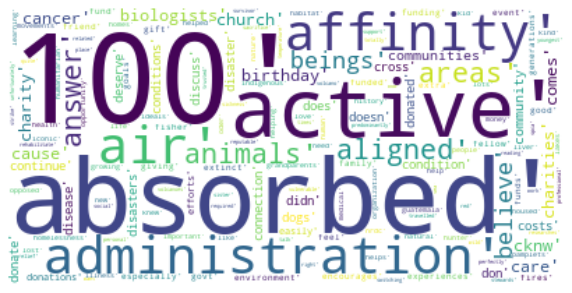

In [30]:

reviews = cluster_0["Can you share why you donated to that specific charity/cause?"]
tfidf = TfidfVectorizer(min_df= 1,stop_words="english").fit(reviews)
data_positive = tfidf.transform(reviews)
my_df2 = pd.DataFrame(columns=tfidf.get_feature_names(), data=data_positive.toarray())
text = tfidf.get_feature_names()
wordcloud = WordCloud(background_color="white").generate(str(text))
plt.figure(figsize = (10.0,8.0))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


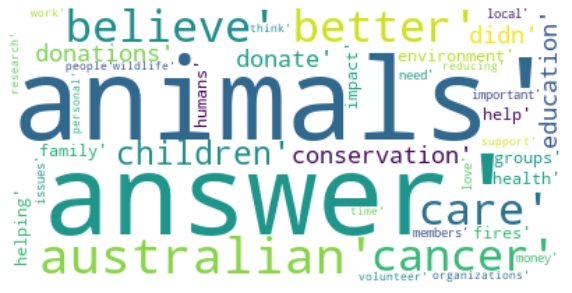

In [31]:

reviews = cluster_1["Can you share why you donated to that specific charity/cause?"]
tfidf = TfidfVectorizer(min_df= 2,stop_words="english").fit(reviews)
data_positive = tfidf.transform(reviews)
my_df2 = pd.DataFrame(columns=tfidf.get_feature_names(), data=data_positive.toarray())
text = tfidf.get_feature_names()
wordcloud = WordCloud(background_color="white").generate(str(text))
plt.figure(figsize = (10.0,8.0))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


## MODEL

In [32]:
# Can we predict what respondents are aware of MMR?

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [34]:
survey.columns = ['Respondent ID', 'Collector ID', 'Start Date', 'End Date', 'IP Address',
       'Have you heard of the Marine Mammal Rescue Centre (MMR)?',
       'How did you hear about the MMR?', 'Other (please specify)',
       'On a scale of 1-5 with 1 being negative and 5 being positive, how do you feel about the Marine Mammal Rescue Centre’s services?',
       'Please explain why you chose your selected ranking?',
       'Please describe what a marine mammal in distress looks like to you?',
       'How confident do you feel that you know what to do when you come across a marine mammal in distress?',
       'Please state what actions you would take if you came across a marine mammal in distress. (Rank your choices with 1 being the best).  Feed the mammal shellfish',
       'Don’t do anything, let nature take its course',
       'Call MMR, the Vancouver Aquarium, or a local rehabilitation centre',
       'Take it home and care for it', 'Keep people and pets away',
       'Take the mammal to the nearest veterinary clinic',
       'Have you donated to a charity in the past year?',
       "What type of charity/cause have you most frequently donated to in the past year?",
       'Other (please specify).1',
       'Can you share why you donated to that specific charity/cause?',
       'How did you find out about that specific charity/cause?',
       'Other (please specify).2', 'How do you prefer to make your donations?',
       'Other (please specify).3',
       'Have you considered donating money to the Marine Mammal Rescue Center?',
       'Have you considered donating money to ocean health and conservation causes?',
       'City/Town', 'State/Province', 'Country', 'What is your age?',
       'What is the highest level of education achieved?',
       'Do you have an affiliation to MMR?',
       'Do you have an affiliation to the Vancouver Aquarium?',
       'Other (please specify).4',
       'If you would like to be entered into a random draw for two general admission passes to the Vancouver Aquarium, please share your email address:',
       'clusters']

In [35]:
survey_ready = survey[['Have you heard of the Marine Mammal Rescue Centre (MMR)?',
       'Please state what actions you would take if you came across a marine mammal in distress. (Rank your choices with 1 being the best).  Feed the mammal shellfish',
       'Don’t do anything, let nature take its course',
       'Call MMR, the Vancouver Aquarium, or a local rehabilitation centre',
       'Take it home and care for it', 'Keep people and pets away',
       'Take the mammal to the nearest veterinary clinic',
       'Have you donated to a charity in the past year?',
       "What type of charity/cause have you most frequently donated to in the past year?",
       'How did you find out about that specific charity/cause?',
        'How do you prefer to make your donations?',
       'Have you considered donating money to the Marine Mammal Rescue Center?',
       'Have you considered donating money to ocean health and conservation causes?',
       'City/Town', 'State/Province', 'Country', 'What is your age?',
       'What is the highest level of education achieved?',
       'Do you have an affiliation to MMR?',
       'Do you have an affiliation to the Vancouver Aquarium?', "clusters"]].copy()

In [36]:
mmr = pd.get_dummies(survey_ready, drop_first = True)

In [37]:
mmr.shape

(139, 132)

In [38]:
mmr.head()

Please state what actions you would take if you came across a marine mammal in distress. (Rank your choices with 1 being the best).  Feed the mammal shellfish  \
0                                                  0                                                                                                                
1                                                  4                                                                                                                
2                                                  0                                                                                                                
3                                                  0                                                                                                                
4                                                  5                                                                                                                

   Don’t do anything, let nature take its course  \
0                                              0   
1                                              5   
2                                              0   
3                                              0   
4                                              4   

   Call MMR, the Vancouver Aquarium, or a local rehabilitation centre  \
0                                                  1                    
1                                                  1                    
2                                                  1                    
3                                                  0                    
4                                                  1                    

   Take it home and care for it  Keep people and pets away  \
0                             0                          2   
1                             6                          2   
2                             0                          2   
3                             0                          0   
4                             6                          3   

   Take the mammal to the nearest veterinary clinic  clusters  \
0                                                 0         1   
1                                                 3         1   
2                                                 0         1   
3                                                 0         0   
4                                                 2         0   

   Have you heard of the Marine Mammal Rescue Centre (MMR)?_Yes  \
0                                                  1              
1                                                  1              
2                                                  1              
3                                                  1              
4                                                  0              

   Have you donated to a charity in the past year?_Yes  \
0                                                  1     
1                                                  1     
2                                                  1     
3                                                  1     
4                                                  0     

   What type of charity/cause have you most frequently donated to in the past year?_Didn't answer it  \
0                                                  0                                                   
1                                                  0                                                   
2                                                  0                                                   
3                                                  0                                                   
4                                                  1                                                   

   ...  \
0  ...   
1  ...   
2  ...   
3  ...   
4  ...   

   What is the highest level of education achieved?_Less t

In [39]:
target = mmr["Have you heard of the Marine Mammal Rescue Centre (MMR)?_Yes"].copy()

In [40]:
mmr.drop("Have you heard of the Marine Mammal Rescue Centre (MMR)?_Yes", axis = 1, inplace = True)

In [41]:
mmr["Have you heard of the Marine Mammal Rescue Centre (MMR)?_Yes"] = target

In [42]:
# Splitting the data
X = mmr.iloc[:,0:130]
y = mmr.iloc[:,-1]


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [44]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
print(f"LR training set accuracy: {LR_model.score(X_train, y_train)}")

LR training set accuracy: 0.963963963963964


In [46]:
print(f"LR test set accuracy: {LR_model.score(X_test, y_test)}")

LR test set accuracy: 0.7142857142857143


In [47]:
coef_dict = {}
for coef, feat in zip(LR_model.coef_[0,:],X_train.columns):
    coef_dict[feat] = coef

In [48]:
coefficients = pd.DataFrame.from_dict(coef_dict,orient='index')
coefficents = coefficients.reset_index()
coefficents.columns = ["Feature", "Coefficient"]
coefficents.sort_values(by = "Coefficient", ascending = False)

Feature  Coefficient
114                            What is your age?_50-64     1.392805
6                                             clusters     1.004646
33   Have you considered donating money to the Mari...     0.979661
91                                   State/Province_Bc     0.966044
102                                     Country_Canada     0.732465
..                                                 ...          ...
49                                   City/Town_Langley    -0.647532
96                     State/Province_Didn't answer it    -0.662768
13   What type of charity/cause have you most frequ...    -0.877620
31   Have you considered donating money to the Mari...    -0.960178
128  Do you have an affiliation to the Vancouver Aq...    -1.076857

[130 rows x 2 columns]

In [49]:
y_pred = LR_model.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix

con_mat = confusion_matrix(y_test,y_pred)
con_mat

array([[ 2,  3],
       [ 5, 18]], dtype=int64)

In [51]:
df_con_mat = pd.DataFrame(con_mat, columns = ['Predicted 0','Predicted 1'],
                 index = ['True 0','True 1'])

df_con_mat

Predicted 0  Predicted 1
True 0            2            3
True 1            5           18

In [52]:
# model is failing to predict respondents that haven't heard of MMR
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.29      0.40      0.33         5
           1       0.86      0.78      0.82        23

    accuracy                           0.71        28
   macro avg       0.57      0.59      0.58        28
weighted avg       0.76      0.71      0.73        28



In [53]:
DT_model = DecisionTreeClassifier(max_depth=3)
DT_model.fit(X_train, y_train)


print(f"DT training set accuracy: {DT_model.score(X_train, y_train)}")

DT training set accuracy: 0.9099099099099099


In [54]:
DT_model.score(X_test,y_test)

0.75

In [55]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

C:\Users\gisel\anaconda3\envs\deeplearning\lib\site-packages\sklearn\externals\six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



In [56]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

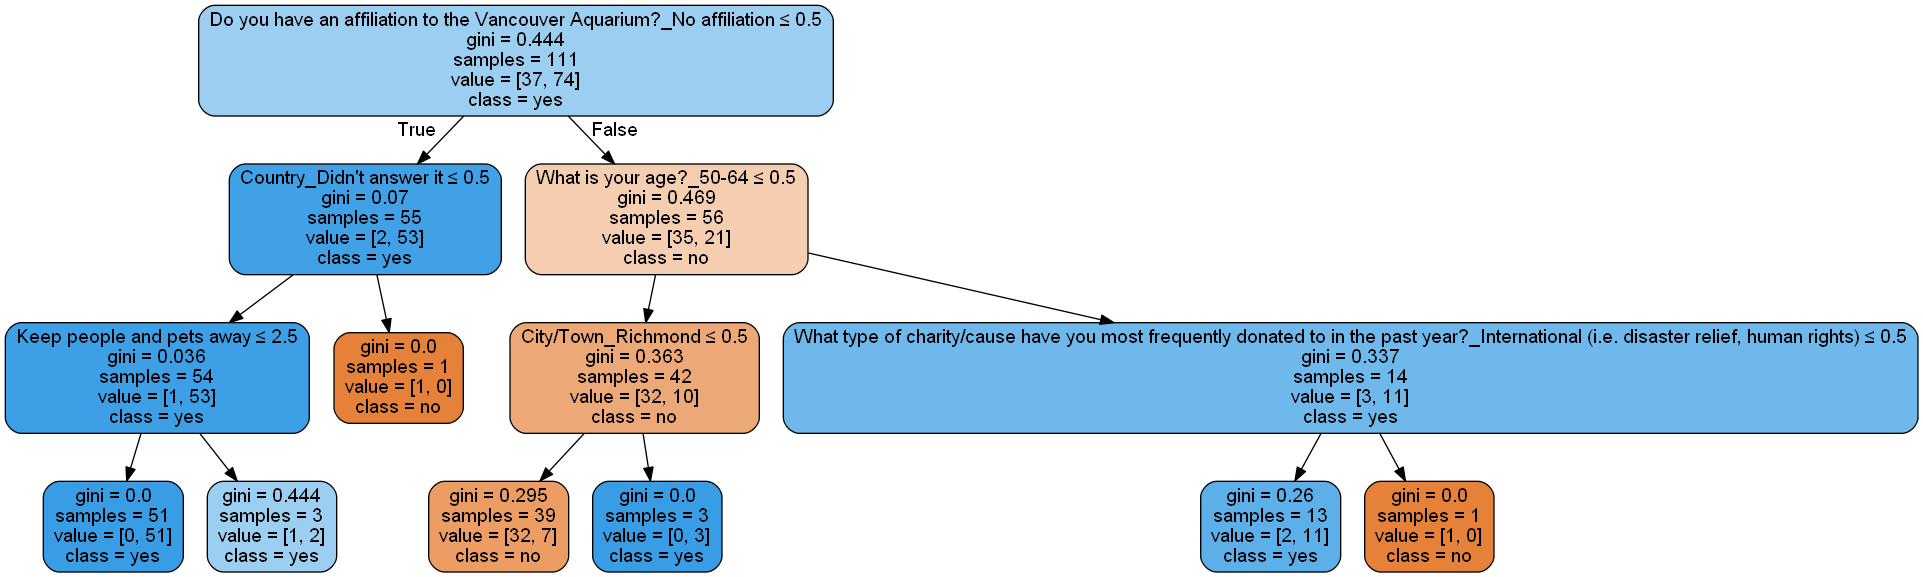

In [57]:
import sklearn.tree as tree
import pydotplus
from sklearn.externals.six import StringIO 
from IPython.display import Image
dic = {0: "no", 1 : "yes"}

dot_data = StringIO()
tree.export_graphviz(DT_model, 
 out_file=dot_data, 
 class_names=dic,
feature_names = list(X.columns),                     
 filled=True, 
 rounded=True, 
 special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [58]:
# Can we predict what respondents would donate to MMR?

In [59]:
col_drop = ['City/Town', 'State/Province', 'Country']
for col in col_drop:
    survey_ready.drop(col, axis = 1, inplace = True)

In [60]:
survey_ready["Have you considered donating money to the Marine Mammal Rescue Center?"].value_counts()

No                   60
Yes                  49
Need to know more    29
Didn't answer it      1
Name: Have you considered donating money to the Marine Mammal Rescue Center?, dtype: int64

In [61]:
survey_ready.shape

(139, 18)

In [62]:
#survey_ready.loc[(survey_ready["Have you considered donating money to the Marine Mammal Rescue Center?"] == "Yes"), "Have you considered donating money to the Marine Mammal Rescue Center?" ] = 1
#survey_ready.loc[(survey_ready["Have you considered donating money to the Marine Mammal Rescue Center?"] == "No"), "Have you considered donating money to the Marine Mammal Rescue Center?" ] = 0
survey_ready.loc[(survey_ready["Have you considered donating money to the Marine Mammal Rescue Center?"] == "Need to know more"), "Have you considered donating money to the Marine Mammal Rescue Center?" ] = "No" 
survey_ready.loc[(survey_ready["Have you considered donating money to the Marine Mammal Rescue Center?"] == "Didn't answer it"), "Have you considered donating money to the Marine Mammal Rescue Center?" ] = "No"
# 0 wouldn't donate, 2 would donate, 1 needs to know more.. only one person didn't answer it and I added it to 0.

In [63]:
survey_ready.shape

(139, 18)

In [64]:
mmr_donation = pd.get_dummies(survey_ready, drop_first = True)

In [65]:
mmr_donation.shape

(139, 54)

In [66]:
target = mmr_donation['Have you considered donating money to the Marine Mammal Rescue Center?_Yes'] 

In [67]:
mmr_donation.drop('Have you considered donating money to the Marine Mammal Rescue Center?_Yes', axis = 1, inplace = True)

In [68]:
mmr_donation['Have you considered donating money to the Marine Mammal Rescue Center?'] = target

In [69]:
X = mmr_donation.iloc[:,:-1]
y = mmr_donation.iloc[:,-1]

In [70]:
columns_drop = ["What type of charity/cause have you most frequently donated to in the past year?_Didn't answer it",
                "How did you find out about that specific charity/cause?_Didn't answer it",
                "How do you prefer to make your donations?_Didn't answer it",
                "What is your age?_Didn't answer it",
                "What is the highest level of education achieved?_Didn't answer it"]
                
for col in columns_drop:             
        X.drop(col, axis = 1, inplace = True)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [72]:
logreg = LogisticRegression(C = 0.1)
logreg.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
print(f"LR training set accuracy: {logreg.score(X_train, y_train)}")

LR training set accuracy: 0.8648648648648649


In [74]:
logreg.score(X_test,y_test)

0.7142857142857143

In [75]:
coef_dict = {}
for coef, feat in zip(logreg.coef_[0,:],X_train.columns):
    coef_dict[feat] = coef

In [76]:
coefficients = pd.DataFrame.from_dict(coef_dict,orient='index')
coefficents = coefficients.reset_index()
coefficents.columns = ["Feature", "Coefficient"]
coefficients = coefficents.sort_values(by = "Coefficient", ascending = False)

In [77]:
coefficients["likelihood"] = np.exp(coefficients["Coefficient"])

In [78]:
pd.options.display.max_colwidth = 100

In [79]:
coefficients

Feature  \
42                                                               Do you have an affiliation to MMR?_Yes   
7                                          Have you heard of the Marine Mammal Rescue Centre (MMR)?_Yes   
31                      Have you considered donating money to ocean health and conservation causes?_Yes   
22      How did you find out about that specific charity/cause?_I learned about it through volunteering   
47                                      Do you have an affiliation to the Vancouver Aquarium?_Volunteer   
6                                                                                              clusters   
17  What type of charity/cause have you most frequently donated to in the past year?_Wildlife conser...   
5                                                      Take the mammal to the nearest veterinary clinic   
36                            What is the highest level of education achieved?_College or CEGEP diploma   
44                                         Do you have an affiliation to the Vancouver Aquarium?_Member   
9      What type of charity/cause have you most frequently donated to in the past year?_Domestic animal   
28                                                    How do you prefer to make your donations?_Website   
37                                 What is the highest level of education achieved?_High-school diploma   
2                                    Call MMR, the Vancouver Aquarium, or a local rehabilitation centre   
21  How did you find out about that specific charity/cause?_I learned about it through an event I at...   
40                                      What is the highest level of education achieved?_Trades diploma   
15  What type of charity/cause have you most frequently donated to in the past year?_International (...   
32                                                                              What is your age?_35-49   
16            What type of charity/cause have you most frequently donated to in the past year?_Veterans   
1                                                         Don’t do anything, let nature take its course   
20  How did you find out about that specific charity/cause?_I learned about it from a fundraiser (e....   
43                                          Do you have an affiliation to the Vancouver Aquarium?_Donor   
29        Have you considered donating money to ocean health and conservation causes?_Need to know more   
27                                               How do you prefer to make your donations?_Social media   
35                                                                           What is your age?_Under 25   
33                                                                              What is your age?_50-64   
14  What type of charity/cause have you most frequently donated to in the past year?_Indigenous comm...   
25                                                   How do you prefer to make your donations?_By phone   
3                                                                          Take it home and care for it   
26                                                  How do you prefer to make your donations?_In person   
46                                          Do you have an affiliation to the Vancouver Aquarium?_Staff   
34                                                                                What is your age?_65+   
18               What type of charity/cause have you most frequently donated to in the past year?_Youth   
8                                                   Have you donated to a charity in the past year?_Yes   
24                    How did you find out about that specific charity/cause?_Through my work or school   
0   Please state what actions you would take if you came across a marine mammal in distress. (Rank y...   
38                       What is the highest level of education achieved?_Less than high school diploma   
19  How did you find out about

In [80]:
DT_model = DecisionTreeClassifier(max_depth=3)
DT_model.fit(X_train, y_train)


print(f"DT training set accuracy: {DT_model.score(X_train, y_train)}")

DT training set accuracy: 0.8648648648648649


In [81]:
DT_model.score(X_test, y_test)

0.6428571428571429

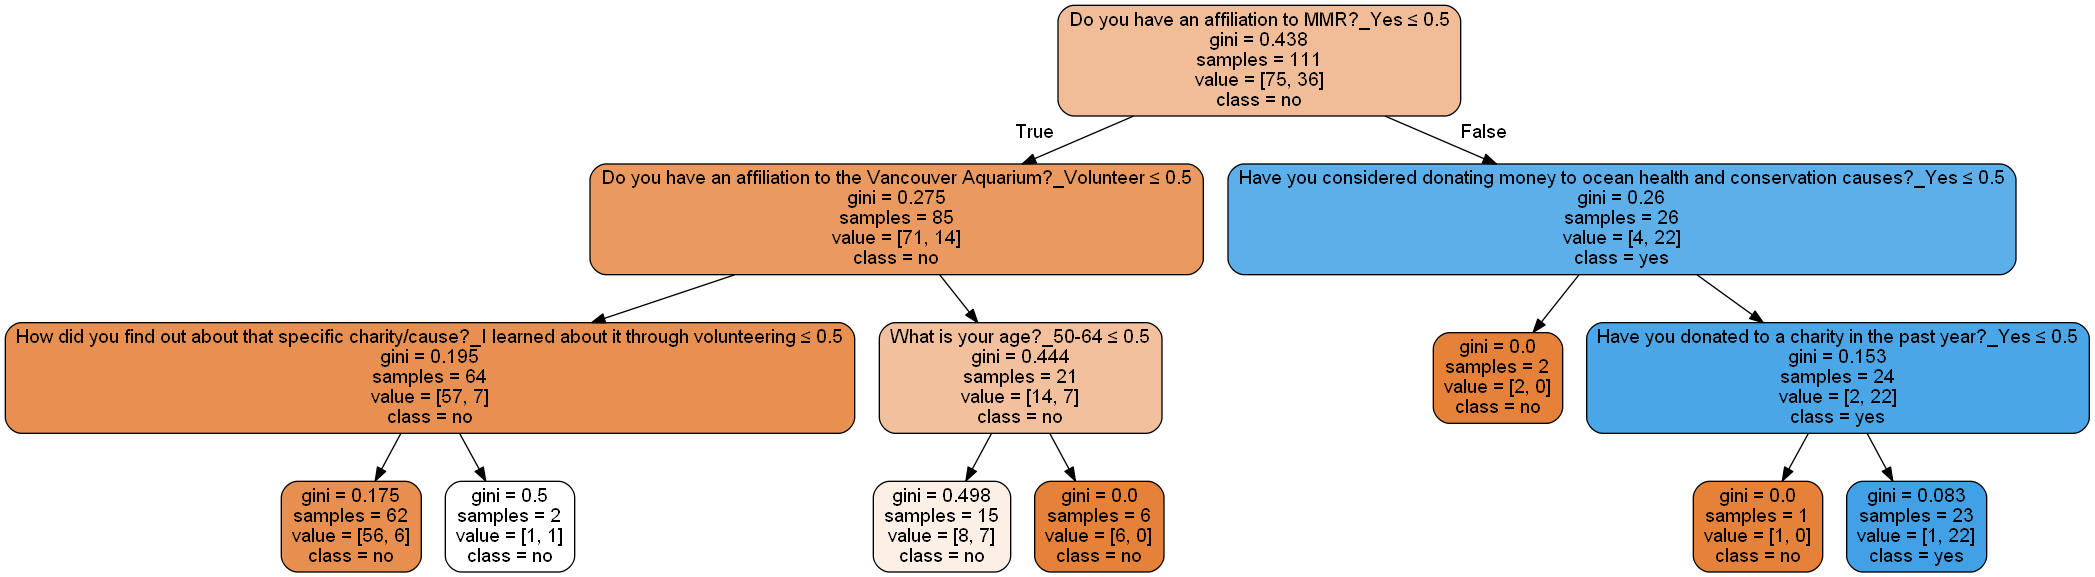

In [82]:
import sklearn.tree as tree
import pydotplus
from sklearn.externals.six import StringIO 
from IPython.display import Image
dic = {0: "no", 1 : "yes"}

dot_data = StringIO()
tree.export_graphviz(DT_model, 
 out_file=dot_data, 
 class_names=dic,
feature_names = list(X.columns),                     
 filled=True, 
 rounded=True, 
 special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())